EDA-LOAN-STATUS-PREDICTION

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dataset=pd.read_csv(r"C:\Users\ut\Downloads\train_clean.csv")

In [30]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,8.430109,7.319202,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,7.856707,7.765993,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,8.699515,0.000000,4.948760,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,7.972466,0.000000,4.262680,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,8.320205,0.000000,3.688879,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8.996157,5.484797,5.533389,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,8.933664,0.000000,5.231109,360.0,1.0,2,1


In [31]:
dataset.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [32]:
dataset['Gender'].value_counts()

1    500
0    114
Name: Gender, dtype: int64

In [33]:
dataset.Gender=dataset.Gender.fillna('Male')

In [34]:
dataset['Married'].value_counts()

1    400
0    214
Name: Married, dtype: int64

In [35]:
dataset['Dependents'].value_counts()

0    354
2    105
1    104
3     51
Name: Dependents, dtype: int64

In [36]:
dataset.Dependents=dataset.Dependents.fillna('0')

In [37]:
dataset['Self_Employed'].value_counts()

0    528
1     86
Name: Self_Employed, dtype: int64

In [38]:
dataset.Self_Employed=dataset.Self_Employed.fillna('No')

In [39]:
dataset.LoanAmount=dataset.LoanAmount.fillna(dataset.LoanAmount.mean())

In [40]:
dataset['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [41]:
dataset.Loan_Amount_Term=dataset.Loan_Amount_Term.fillna(360.0)

In [42]:
dataset['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [43]:
dataset.Credit_History=dataset.Credit_History.fillna(1.0)

In [44]:
dataset.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

ALL NULL VALUES ARE REMOVED

DATA VISUALIZATION

In [45]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,8.430109,7.319202,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,7.856707,7.765993,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


SPLITTING IN X & Y

In [46]:
#Splitting traing data into x&y
x=dataset.iloc[:,1:12].values
y=dataset.iloc[:, 12].values

In [47]:
x

array([[  1.,   0.,   0., ..., 360.,   1.,   2.],
       [  1.,   1.,   1., ..., 360.,   1.,   0.],
       [  1.,   1.,   0., ..., 360.,   1.,   2.],
       ...,
       [  1.,   1.,   1., ..., 360.,   1.,   2.],
       [  1.,   1.,   2., ..., 360.,   1.,   2.],
       [  0.,   0.,   0., ..., 360.,   0.,   1.]])

In [48]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [49]:
x.shape

(614, 11)

In [50]:
y.shape

(614,)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [53]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

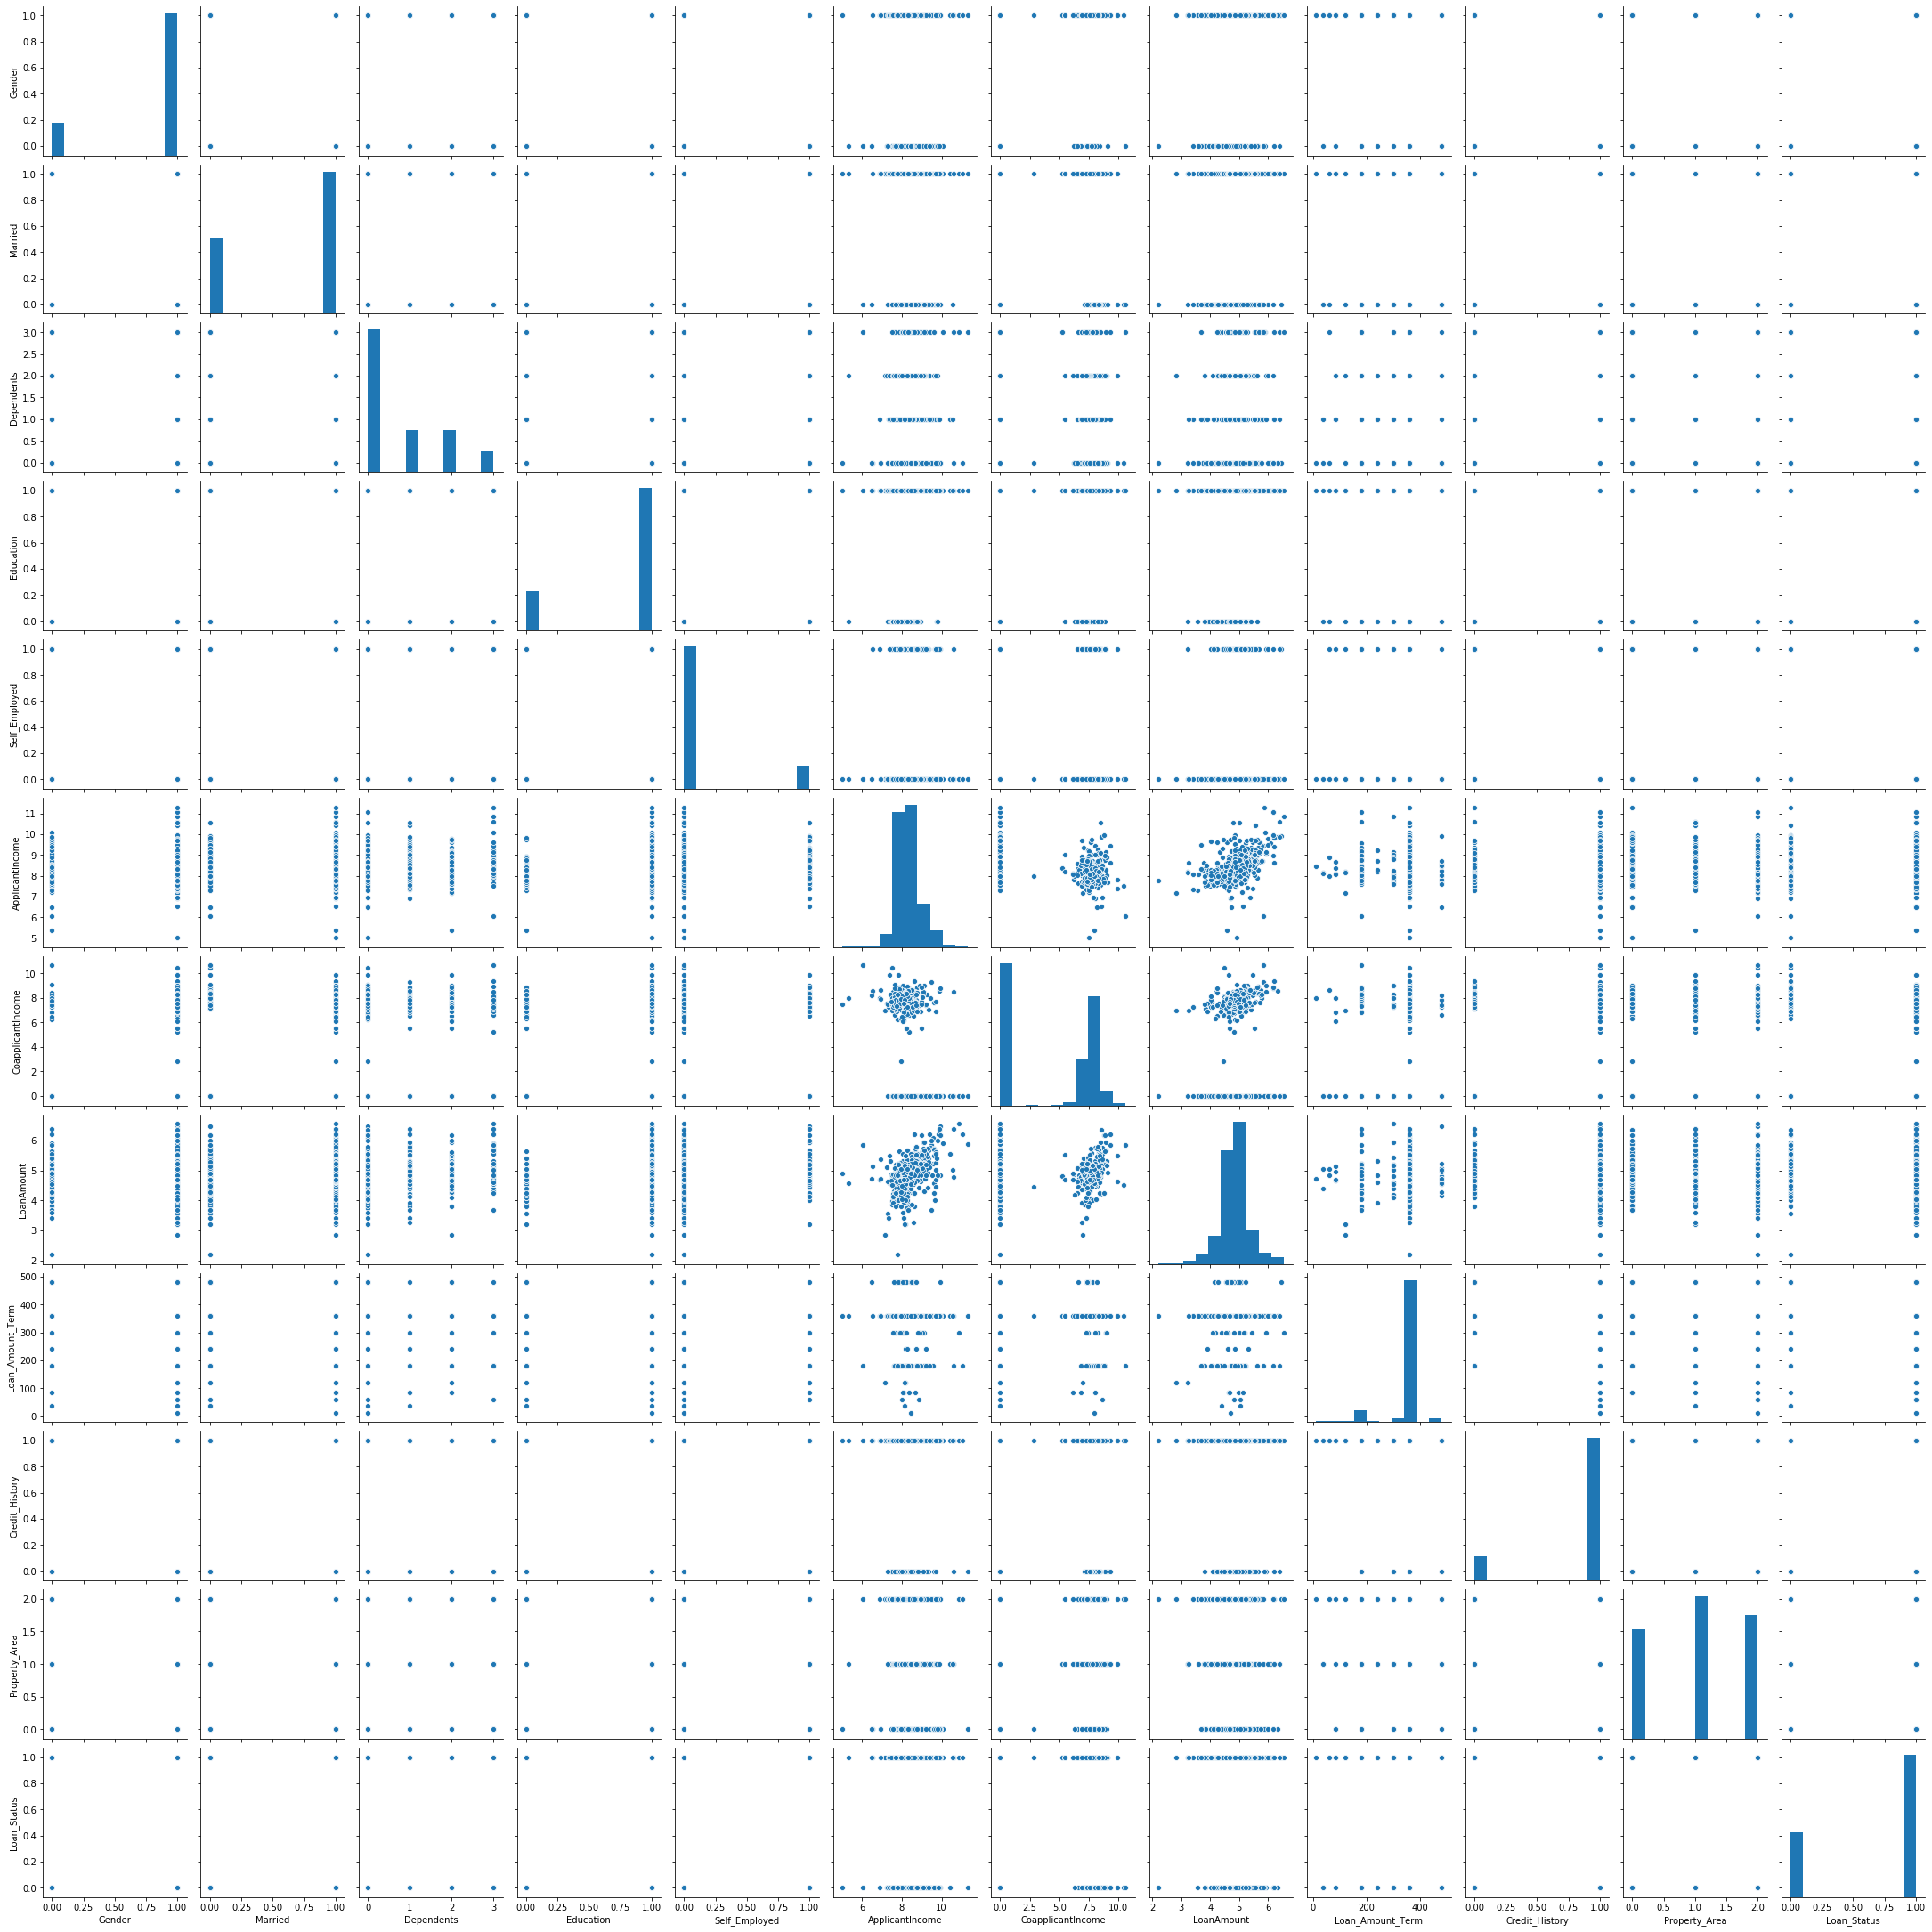

In [54]:
sns.pairplot(dataset)

## knn

In [55]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_knn=metrics.auc(fpr,tpr)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8116883116883117

In [56]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_nlsvc=metrics.auc(fpr,tpr)
accuracy_score(y_test,y_pred)

0.8376623376623377

In [57]:
lsvm=SVC(kernel='linear')
lsvm.fit(x_train,y_train)
y_pred=lsvm.predict(x_test)
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_lscv=metrics.auc(fpr,tpr)
accuracy_score(y_test,y_pred)

0.8311688311688312

In [58]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression()
logr.fit(x_train,y_train)
y_pred=logr.predict(x_test)

C:\Users\ut\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
import pickle
pickle.dump(logr,open('loanprediction.pkl','wb'))
model=pickle.load(open('loanprediction.pkl','rb'))

In [60]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc_LR=metrics.auc(fpr,tpr)
accuracy_score(y_test,y_pred)

0.8311688311688312

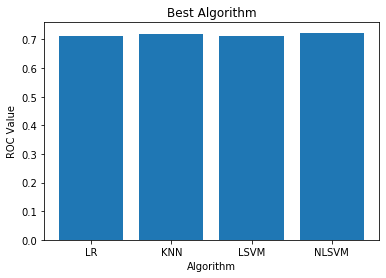

In [61]:
roclist=[roc_auc_LR,roc_auc_knn,roc_auc_lscv,roc_auc_nlsvc]
name=["LR","KNN","LSVM","NLSVM"]
plt.bar(name,roclist)
plt.title("Best Algorithm")
plt.xlabel("Algorithm") 
plt.ylabel("ROC Value") 
plt.show()